In [40]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random

B_all = []
B_images = []
tdiachua = []
tgiaykhangsinh = []
tvungvokhuan = []

images_path = os.path.join(os.getcwd(), '/home/trdoan20/dev/cpp/CV/ImageSets/')
annotations_path = os.path.join(os.getcwd(), '/home/trdoan20/dev/cpp/CV/SegmentationClass/')

images_name = os.listdir(images_path)
annotations_name = os.listdir(annotations_path)

images_name_train, images_name_test, annotations_name_train, annotations_name_test = [], [], [], []
# print(images_name_train == annotations_name_train)
# base_dir = '/home/tdoan20/dev/cpp/CV/ImageBase/notblood/'
# os.chdir(working_dir)
# !ls
names = []
au = os.walk(images_path)
rate = 37
for (roots, dir, files) in au:
    for name in files:
        names.append(name.replace('.jpg', ''))
p = random.sample(names, 37)
for i in names:
    if i in p:
        images_name_train.append(i+'.jpg')
        annotations_name_train.append(i+'.png')
    else:
        images_name_test.append(i+'.jpg')
        annotations_name_test.append(i+'.png')
# print(names)
# training_images_names = []
# test_images_names = []

# training_annotation_names = []
# test_annotation_names = []

print(len(images_name_train))
print(len(annotations_name_train))

37
37


### Doc Image

In [30]:
def docImage(filename):
    image_path = os.path.join(images_path, filename)
    # print(image_path)
    image = cv2.imread(image_path)
    # plt.imshow(image)
    return image

### 3 Doc Truth Image

In [31]:

def docTruthImage(filename):
    ano_path = os.path.join(annotations_path, filename)
    anotati = cv2.imread(ano_path)
    return anotati
    plt.imshow(anotation)


### Thay patern theo labelmap.txt cho từng class

In [46]:
patern = [102,255,102]
# Blue, Red, Green = [], [], []
B_imgs = [[], [], []]
# ii = docImage('luma_box8_82837cfd-e217-4cf7-97fb-353adc4ed2c6.jpg')
# aa = docTruthImage('luma_box8_82837cfd-e217-4cf7-97fb-353adc4ed2c6.png')
# plt.imshow(aa)
# # colors = np.unique(aa[:,:,0])
# # print(colors)
# vvk = aa[:, :, 0].copy()
# vvk[np.where(vvk==102)] = 0
# Bt = np.array(ii[:,:,0])
# Bt[np.where(vvk==0)] = 0
# plt.imshow(Bt)
for i in images_name_train:
    img = docImage(i)
    j = i
    ano = docTruthImage(j.replace('jpg', 'png'))
    for k in range(3):
        vvk = ano[:,:,k].copy()
        vvk[np.where(vvk != patern[k])] = 0
        Bt = np.array(img[:, :, k])
        Bt[vvk==0] = 0
        Bt = Bt[:]
        B_imgs[k].append(Bt[Bt>0])

In [47]:
print(len(B_imgs))
MIN, MAX = [], []
for i in range(3):
    B_alll = np.concatenate(B_imgs[i])
    B_mean = np.mean(B_alll)
    B_std = np.std(B_alll)
    Low = B_mean - B_std
    High = B_mean + B_std
    MIN.append(Low)
    MAX.append(High)
print(MIN, MAX)

3
[32.2084267449019, 39.6612831004534, 44.30325282389873] [65.21472150134665, 76.36149918574242, 79.72290027683793]


In [ ]:
images_test = []
annotations_test = []
    
for image_name in images_name_test:
    images_test.append(cv2.imread(os.path.join(images_path, image_name)))

for annotation_name in annotations_name_test:
    annotations_test.append(cv2.imread(os.path.join(annotations_path, annotation_name)))

In [ ]:
import matplotlib.pyplot as plt

mask = model.predict(images_test[0], 'DiaChua')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(images_test[0], cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

im = docImage()

[  0 102 240 255]


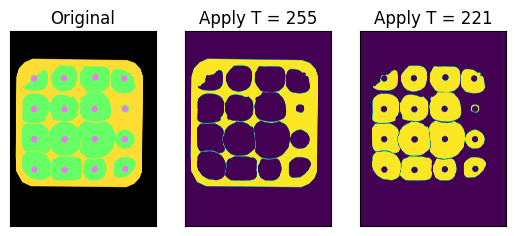

In [39]:
im = docImage(images_name_test[0])
plt.subplot(1, 3, 1)
plt.title("Original")
plt.xticks([]), plt.yticks([])

on = docTruthImage(annotations_name_test[0])
plt.imshow(on)
noo = np.array(on[:, :, 0])
noo[np.where(noo!=255)]=0
plt.subplot(1, 3, 2)
plt.title("Apply T = 255")
plt.xticks([]), plt.yticks([])
plt.imshow(noo)
no2 = np.array(on[:, :, 0])
print(np.unique(no2))
no2[np.where(no2!=102)]=0
plt.subplot(1, 3, 3)
plt.title("Apply T = 221")
plt.xticks([]), plt.yticks([])
plt.imshow(no2)
